# IRIS with Tensorflow

**Using Deep Learning - Tensorflow to classify the IRIS dataset. This dataset has 5 features, out of which 4 features are numeric features and 1 is a categorical feature**

## Loading dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

2024-07-19 22:38:48.691689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# np.c_ is the numpy concatenate function
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


## Preparing dataset

In [5]:
X = iris_data.loc[:, iris_data.columns != 'species']
y = iris_data.loc[:, ['species']]

In [6]:
y_enc = LabelEncoder().fit_transform(y)
# Converting the label into a matrix form
y_label = tf.keras.utils.to_categorical(y_enc)

/Users/loandoan/opt/anaconda3/envs/ds_intermediate/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3, random_state=10)

In [8]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (105, 4), Y Train : (105, 3)
(4,)


In [9]:
keras.layers.Input

<function keras.engine.input_layer.Input(shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None, ragged=None, type_spec=None, **kwargs)>

In [10]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(800, activation='relu'),
        keras.layers.Dense(300, activation='relu',),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [11]:
model = get_model()

# Compile the model
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               4000      
                                                                 
 dense_1 (Dense)             (None, 300)               240300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 903       
                                                                 
Total params: 245,203
Trainable params: 245,203
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 0s 29ms/step - loss: 1.1541 - accuracy: 0.4190 - val_loss: 0.8445 - val_accuracy: 0.6444
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 0.7543 - accuracy: 0.6857 - val_loss: 0.6528 - val_accuracy: 0.7333
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 0.5781 - accuracy: 0.7429 - val_loss: 0.5540 - val_accuracy: 0.6222
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.7905 - val_loss: 0.4461 - val_accuracy: 0.9556
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4078 - accuracy: 0.9048 - val_loss: 0.4579 - val_accuracy: 0.6222
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3742 - accuracy: 0.7810 - val_loss: 0.3998 - val_accuracy: 0.7556
Epoch 7/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3129 - accuracy: 0.9238 - val_loss: 0.3283 - val_accuracy: 0.9333
Epoch 8/30
4/4 [=================

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 1.0000


[0.08999144285917282, 1.0]

## Performance Monitor

In [15]:
history.history

{'loss': [1.1540759801864624,
  0.7542911171913147,
  0.5780972242355347,
  0.4715713560581207,
  0.4077652394771576,
  0.3741869628429413,
  0.3128887414932251,
  0.31363093852996826,
  0.27818572521209717,
  0.23670895397663116,
  0.21672691404819489,
  0.23190400004386902,
  0.18508940935134888,
  0.16068173944950104,
  0.15395121276378632,
  0.14474785327911377,
  0.14361947774887085,
  0.14107340574264526,
  0.13119596242904663,
  0.17200589179992676,
  0.15934984385967255,
  0.14634665846824646,
  0.12185011059045792,
  0.13757023215293884,
  0.12059473246335983,
  0.14460843801498413,
  0.12912017107009888,
  0.14280951023101807,
  0.10360515862703323,
  0.09688011556863785],
 'accuracy': [0.41904762387275696,
  0.6857143044471741,
  0.7428571581840515,
  0.7904762029647827,
  0.9047619104385376,
  0.7809523940086365,
  0.9238095283508301,
  0.9142857193946838,
  0.9333333373069763,
  0.9714285731315613,
  0.9428571462631226,
  0.9238095283508301,
  0.9714285731315613,
  0.95238

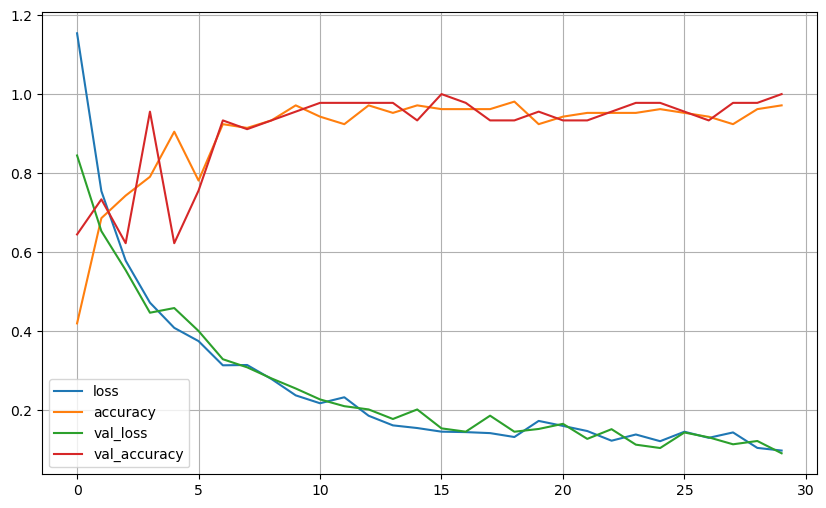

In [24]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
new_data, y_actual = X_test[:3], y_test[:3]

y_proba = model.predict(new_data)

print(f"Actual data : {y_actual}")

for pred in y_proba:
    print(np.argmax(pred))

1/1 [==============================] - 0s 39ms/step
Actual data : [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
1
2
0


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
pred = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


In [20]:
pred.round()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [21]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45



# Great Job!